<a href="https://colab.research.google.com/github/wilferalexander/Covid19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COVID-19**

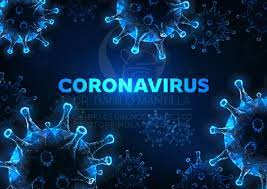


El COVID-19, también conocido como enfermedad por coronavirus 2019, es una enfermedad infecciosa causada por el virus SARS-CoV-2, un tipo de coronavirus que fue identificado por primera vez en diciembre de 2019 en la ciudad de Wuhan, en la provincia de Hubei, China. El término "COVID-19" se deriva de "COronaVIrus Disease 2019".

La enfermedad se propagó rápidamente a nivel mundial, llevando a la Organización Mundial de la Salud (OMS) a declararla como una pandemia el 11 de marzo de 2020. El COVID-19 se caracteriza por síntomas que pueden variar desde leves, como fiebre y tos, hasta síntomas más graves, como dificultades respiratorias, neumonía y, en casos extremos, puede llevar a la muerte.

El virus se propaga principalmente a través de las gotas respiratorias que se generan cuando una persona infectada tose, estornuda o habla. También puede transmitirse al tocar superficies contaminadas y luego tocarse la cara. La pandemia tuvo un impacto significativo en la salud pública, la economía global y la vida cotidiana de las personas en todo el mundo. Se implementaron medidas de distanciamiento social, cuarentenas y restricciones de viaje para frenar la propagación del virus.

La investigación científica y los esfuerzos globales llevaron al desarrollo y aprobación de vacunas contra el COVID-19 para prevenir la enfermedad y reducir su gravedad. La situación con respecto al COVID-19 sigue siendo dinámica, y las medidas para abordar la pandemia continúan evolucionando a medida que se obtiene más información y se implementan estrategias de salud pública.


#**PROBLEMA DE NEGOCIO**


---

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe


para validar nuestros datos

https://data.who.int/dashboards/covid19/cases

https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900

https://www.worldometers.info/coronavirus/worldwide-graphs/





#**1.  Configuración del ambiente**

In [29]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Obtención, Tratamiento y Análisis Exploratorio (EDA)**

En este paso vamos a realizar limpieza de datos, manejar valores faltantes, análisis exploratorio, etc.

In [30]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Cargando las bases de datos

En este paso vamos a cargar dos bases de datos:

Base con informaciones de evolución del Covid19 de World Health Organization, guardaremos esto en df_covid.

Base con informaciones demográficas de Population United Nations, guardaremos en df_populationy filtraremos un año para análisis.

In [31]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [32]:
df_covid.sample(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
49594,2023-10-22,VU,Vanuatu,WPRO,NaN,12019,NaN,14
44360,2021-01-03,SE,Sweden,EURO,41777.0,459906,679.0,10002
15957,2021-02-07,FI,Finland,EURO,3278.0,52991,20.0,744
45246,2021-09-26,TH,Thailand,SEARO,85161.0,1561638,905.0,16268
41068,2022-12-04,SN,Senegal,AFRO,13.0,88882,NaN,1968


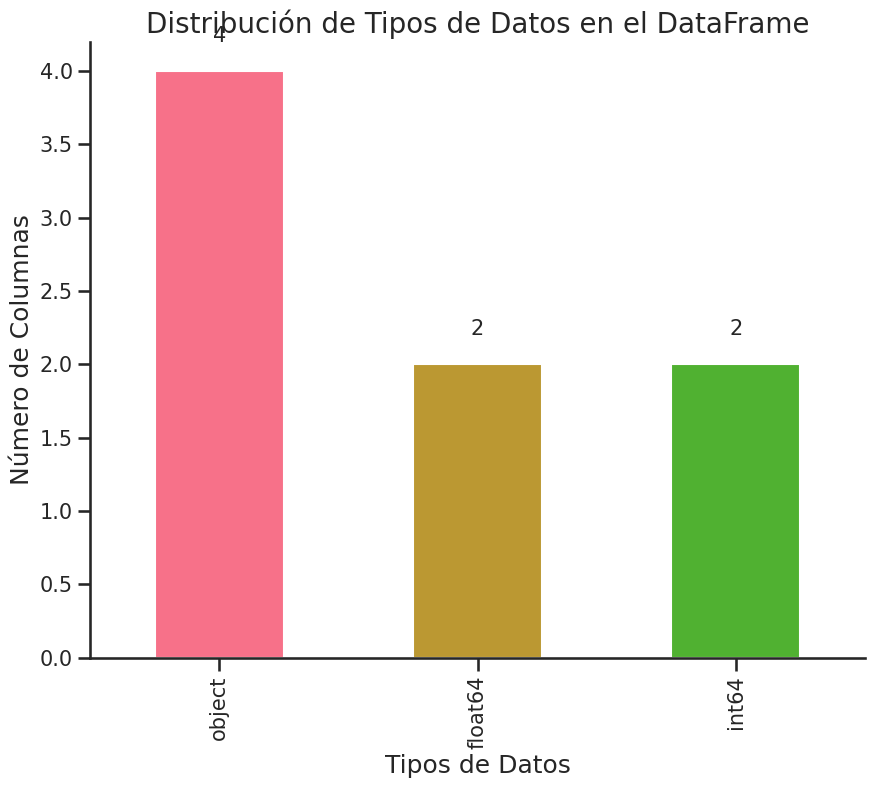

In [33]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_covid.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

graficamos los tipo de datos que tenemos en el dataset para visualizar de manera mas grafica
1. Categoricas tenemos 4
2. Float 2
3. enteras 2

In [35]:
#Información de los datos
print("Número de filas: ",df_covid.shape[0])
print("Número de Columnas:",df_covid.shape[1])
print("Datos Duplicados",df_covid.duplicated().sum())
print("Variables Categóricas: ",df_covid.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_covid.select_dtypes(exclude='object').shape[1])

Número de filas:  50880
Número de Columnas: 8
Datos Duplicados 211
Variables Categóricas:  4
Variables Numéricas:  4


In [37]:
#datos nulos por columna
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

Text(0, 0.5, 'Filas')

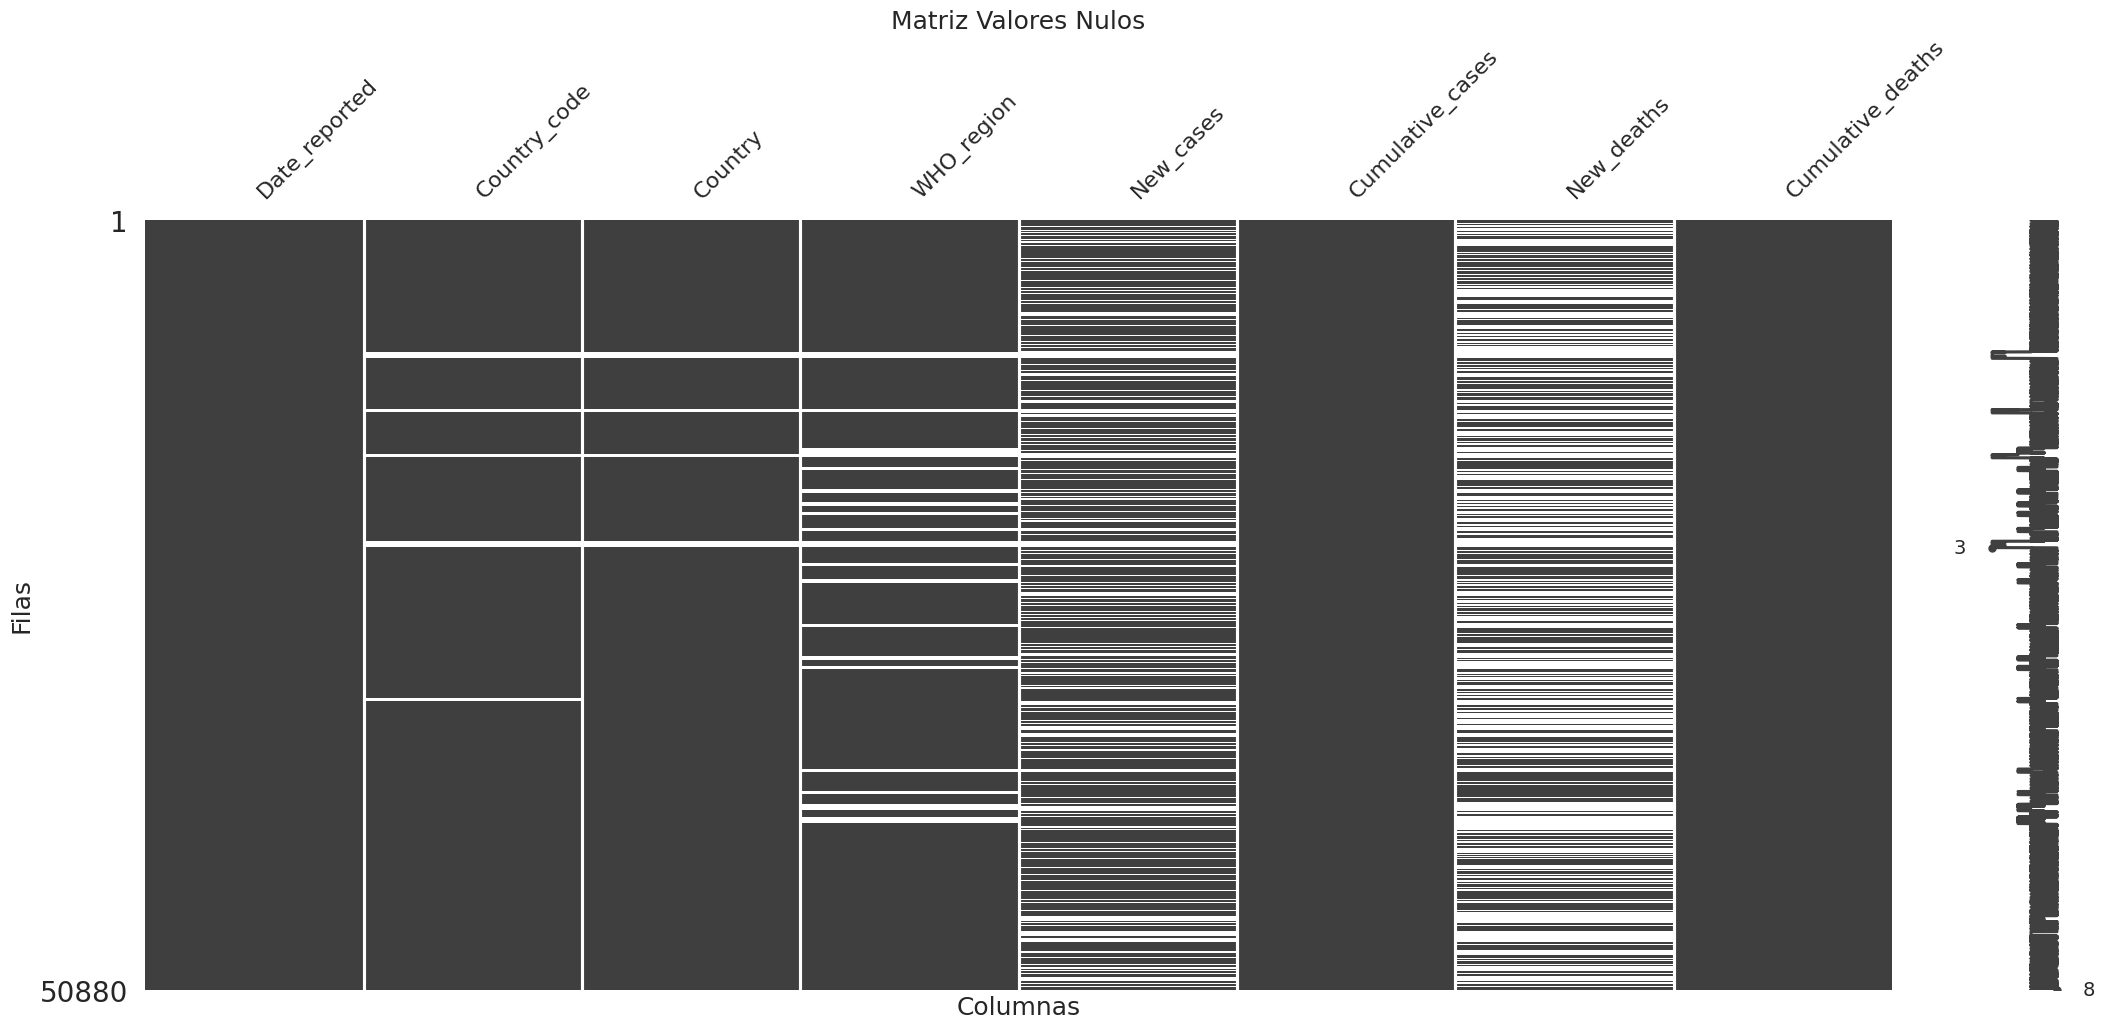

In [38]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Logramos evidenciar que las siguientes variables como New_deaths,New_cases,WHO_region tienen varios valores nulos pero es logico poque son las muertes nuevas y casos nuevos y en que regio las cuales estan altamente correlacionadas

In [39]:
df_covid.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.662200e+04,5.088000e+04,24216.000000,5.088000e+04
mean,2.114490e+04,1.595994e+06,289.905434,1.873122e+04
std,2.794888e+05,7.172653e+06,1232.474473,7.800245e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,5.200000e+01,2.750000e+03,4.000000,2.100000e+01
50%,4.700000e+02,3.813600e+04,21.000000,4.115000e+02
75%,4.477750e+03,4.670500e+05,110.000000,6.066250e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.165780e+06


In [43]:
#Identificar los valores unicos por columna
df_covid.nunique()

Date_reported          212
Country_code           233
Country                234
WHO_region               6
New_cases            11877
Cumulative_cases     31717
New_deaths            2126
Cumulative_deaths    13650
dtype: int64

In [44]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Filtrar solo la columna deseada
columna_filtrada = df_covid[nombre_columna_deseada]
# Mostrar los primeros 5 elementos aleatorios
columna_filtrada.sample(5)

24991    XK
3902     BY
16372    GF
938      AD
11889    KP
Name: Country_code, dtype: object

In [45]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Contar valores nulos en la columna deseada
cantidad_nulos = df_covid[nombre_columna_deseada].isnull().sum()
# Mostrar la cantidad de valores nulos
print(f"La columna '{nombre_columna_deseada}' tiene {cantidad_nulos} valores nulos.")

La columna 'Country_code' tiene 1484 valores nulos.


Mantener en el dataframe sólo las siguientes columnas:
1. 'Date_reported'
2. 'Country_code'
3. 'Country'
4. 'New_cases'
5. 'Cumulative_cases'
6. 'New_deaths'
7. 'Cumulative_deaths'

In [46]:
# Listamos de columnas que deseas mantener
columnas_a_mantener = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_covid_limpio = df_covid[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,NaN,0,NaN,0




1.   Eliminar todos los registros con nulos en la columna Country_code. y crearemos el dataset df_covid_limpio




In [47]:
# Filtramos por Country_code
columna_a_filtrar = 'Country_code'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
df_covid_limpio = df_covid_limpio.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de df_covid_limpio después de eliminar nulos en 'Country_code':")
print(df_covid_limpio.info())

Información de df_covid_limpio después de eliminar nulos en 'Country_code':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          36436 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         24088 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB
None


Text(0, 0.5, 'Filas')

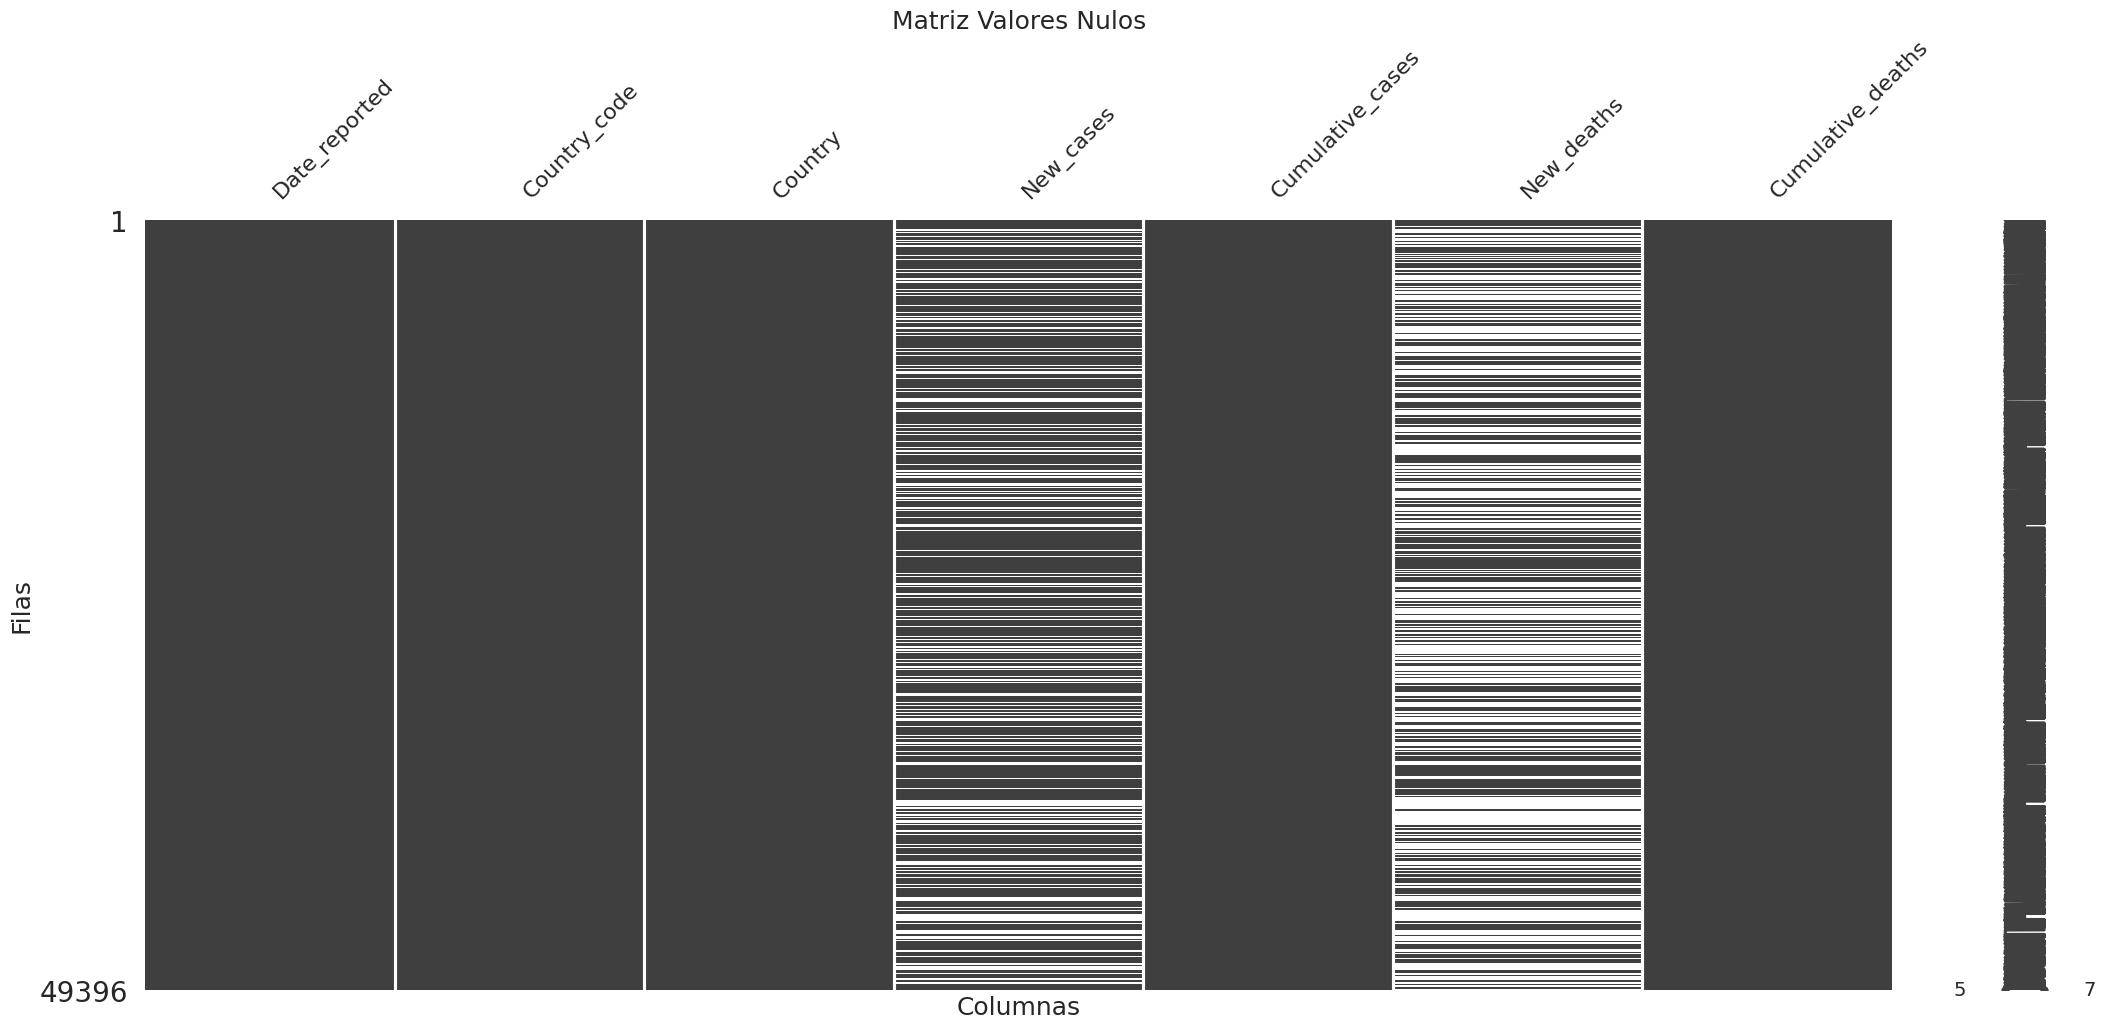

In [48]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir todos los valores nulos con cero.

In [49]:
# Reemplazamos todos los valores nulos con cero en el DataFrame
df_covid_limpio = df_covid_limpio.fillna(0)
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]

In [50]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [51]:
# Verificamos el tipo de dato actual de la columna Date_reported
print("Tipo de dato actual de Date_reported:", df_covid_limpio['Date_reported'].dtype)
# Convertir la columna Date_reported a datetime64
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'], format='%Y-%m-%d')
# Verificamos el tipo de dato después de la conversión
print("Tipo de dato después de la conversión:", df_covid_limpio['Date_reported'].dtype)
df_covid_limpio.head()


Tipo de dato actual de Date_reported: object
Tipo de dato después de la conversión: datetime64[ns]


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


Substituir el formato actual de las columnas ['New_cases', 'New_deaths']para un formato de tipo int64.

In [52]:
# convertimos las columnas 'New_cases' y 'New_deaths' a tipo int64
df_covid_limpio['New_cases'] = pd.to_numeric(df_covid_limpio['New_cases'], errors='coerce', downcast='integer')
df_covid_limpio['New_deaths'] = pd.to_numeric(df_covid_limpio['New_deaths'], errors='coerce', downcast='integer')
# Convertir explícitamente a int64
df_covid_limpio['New_cases']= df_covid_limpio['New_cases'].astype('Int64')
df_covid_limpio['New_deaths']= df_covid_limpio['New_deaths'].astype('Int64')
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de New_cases:", df_covid_limpio['New_cases'].dtype)
print("Tipo de dato después de la conversión de New_deaths:", df_covid_limpio['New_deaths'].dtype)


Tipo de dato después de la conversión de New_cases: Int64
Tipo de dato después de la conversión de New_deaths: Int64


Crear una nueva columna 'lethality_rate' con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100

In [53]:
# Asegúramos de que las columnas 'Cumulative_deaths' y 'Cumulative_cases' sean de tipo numérico
df_covid_limpio['Cumulative_deaths'] = pd.to_numeric(df_covid_limpio['Cumulative_deaths'], errors='coerce')
df_covid_limpio['Cumulative_cases'] = pd.to_numeric(df_covid_limpio['Cumulative_cases'], errors='coerce')
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] =(df_covid_limpio['Cumulative_deaths']/df_covid_limpio['Cumulative_cases'])*100
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
42010,2020-08-30,SX,Sint Maarten (Dutch part),91,444,0,17,3.828829
44197,2021-12-12,SR,Suriname,207,51167,6,1176,2.298356
13714,2022-10-23,EG,Egypt,4,515401,0,24798,4.811399
18495,2020-12-27,GD,Grenada,22,116,0,0,0.000000
29844,2023-02-26,MX,Mexico,20305,7466359,117,333250,4.463354


Vamos a convertir en 0 los valores nulos en la columna lethality_rate

In [54]:
df_covid_limpio = df_covid_limpio.fillna(0)
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
39942,2021-08-29,VC,Saint Vincent and the Grenadines,17,2337,0,12,0.513479
50869,2023-11-12,ZW,Zimbabwe,23,265903,4,5726,2.153417
4257,2020-05-03,BZ,Belize,0,18,0,2,11.111111
10891,2021-07-11,HR,Croatia,587,360768,12,8227,2.280413
49698,2021-09-26,VE,Venezuela (Bolivarian Republic of),7448,360849,104,4379,1.213527


Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99

In [56]:
# Calcular los cuantiles
quantile_0 = df_covid_limpio['lethality_rate'].quantile(0)
quantile_99 = df_covid_limpio['lethality_rate'].quantile(0.99)

In [57]:
# Filtramos el DataFrame para incluir solo los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= quantile_0) & (df_covid_limpio['lethality_rate'] <= quantile_99)]

# Mostrar las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
27345,2024-01-07,LU,Luxembourg,240,390269,0,1000,0.256234
21760,2022-08-14,IN,India,107732,44253464,348,527037,1.190951
46791,2022-11-27,TN,Tunisia,192,1146991,2,29268,2.551720
20016,2021-09-12,GY,Guyana,1407,27519,33,669,2.431048
50824,2023-01-01,ZW,Zimbabwe,202,260146,4,5639,2.167629


In [73]:
# Reiniciar el índice del DataFrame
df_covid_limpio = df_covid_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_covid_limpio.sample(5)


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
38883,2022-01-23,ST,Sao Tome and Principe,321,5816,3,68,1.169188
18062,2022-09-11,GU,Guam,236,48624,4,394,0.810299
15750,2022-11-27,PF,French Polynesia,72,76899,0,649,0.843964
43426,2020-04-12,TH,Thailand,382,2551,15,38,1.489612
2596,2021-02-07,AT,Austria,9181,414739,321,9599,2.314468


# EDA Base Population United Nations

In [74]:
df_population.sample(5)


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
2737,2738,Estimates,Seychelles,NaN,690,SYC,SC,690.0,Country/Area,910,...,201.926,94.32,60.699,83.496,32.781,138.274,188.008,79.568,0.305,2.927
7633,7634,Estimates,Bhutan,NaN,64,BTN,BT,64.0,Country/Area,5501,...,188.548,142.352,61.455,68.073,53.614,138.831,158.172,116.444,0.291,0.379
11233,11234,Estimates,Northern Europe,NaN,924,NaN,NaN,154.0,Subregion,908,...,89.728,54.163,29.823,38.458,21.023,67.826,85.2,50.263,387.95,3.689
3313,3314,Estimates,Angola,NaN,24,AGO,AO,24.0,Country/Area,911,...,371.812,277.488,148.467,177.273,120.306,259.499,305.594,214.355,58.986,1.824
19009,19010,Estimates,Fiji,NaN,242,FJI,FJ,242.0,Country/Area,928,...,263.73,203.752,84.748,94.566,74.428,210.206,238.493,180.315,-11.865,-12.836


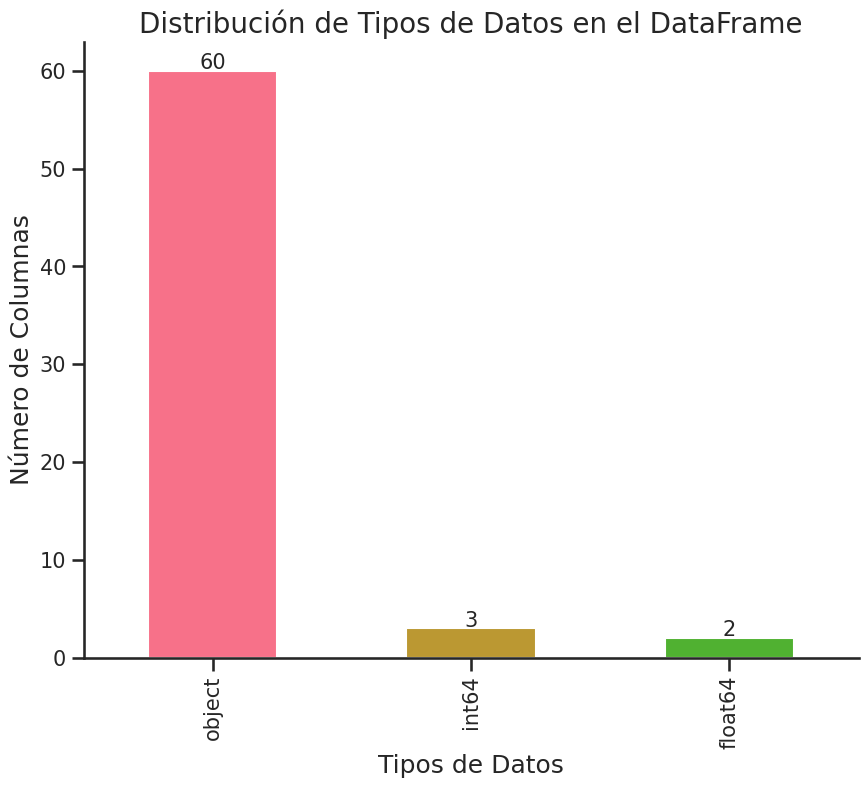

In [75]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_population.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [76]:
#Información de los datos
print("Número de filas: ",df_population.shape[0])
print("Número de Columnas:",df_population.shape[1])
print("Datos Duplicados",df_population.duplicated().sum())
print("Variables Categóricas: ",df_population.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_population.select_dtypes(exclude='object').shape[1])

Número de filas:  286
Número de Columnas: 65
Datos Duplicados 0
Variables Categóricas:  60
Variables Numéricas:  5


In [77]:
#datos nulos por columna
df_population.isnull().sum().sort_values(ascending=False)

Notes                                               210
ISO2 Alpha-code                                      50
ISO3 Alpha-code                                      49
SDMX code**                                           4
Index                                                 0
                                                   ... 
Sex Ratio at Birth (males per 100 female births)      0
Total Deaths (thousands)                              0
Male Deaths (thousands)                               0
Variant                                               0
Net Migration Rate (per 1,000 population)             0
Length: 65, dtype: int64

Text(0, 0.5, 'Filas')

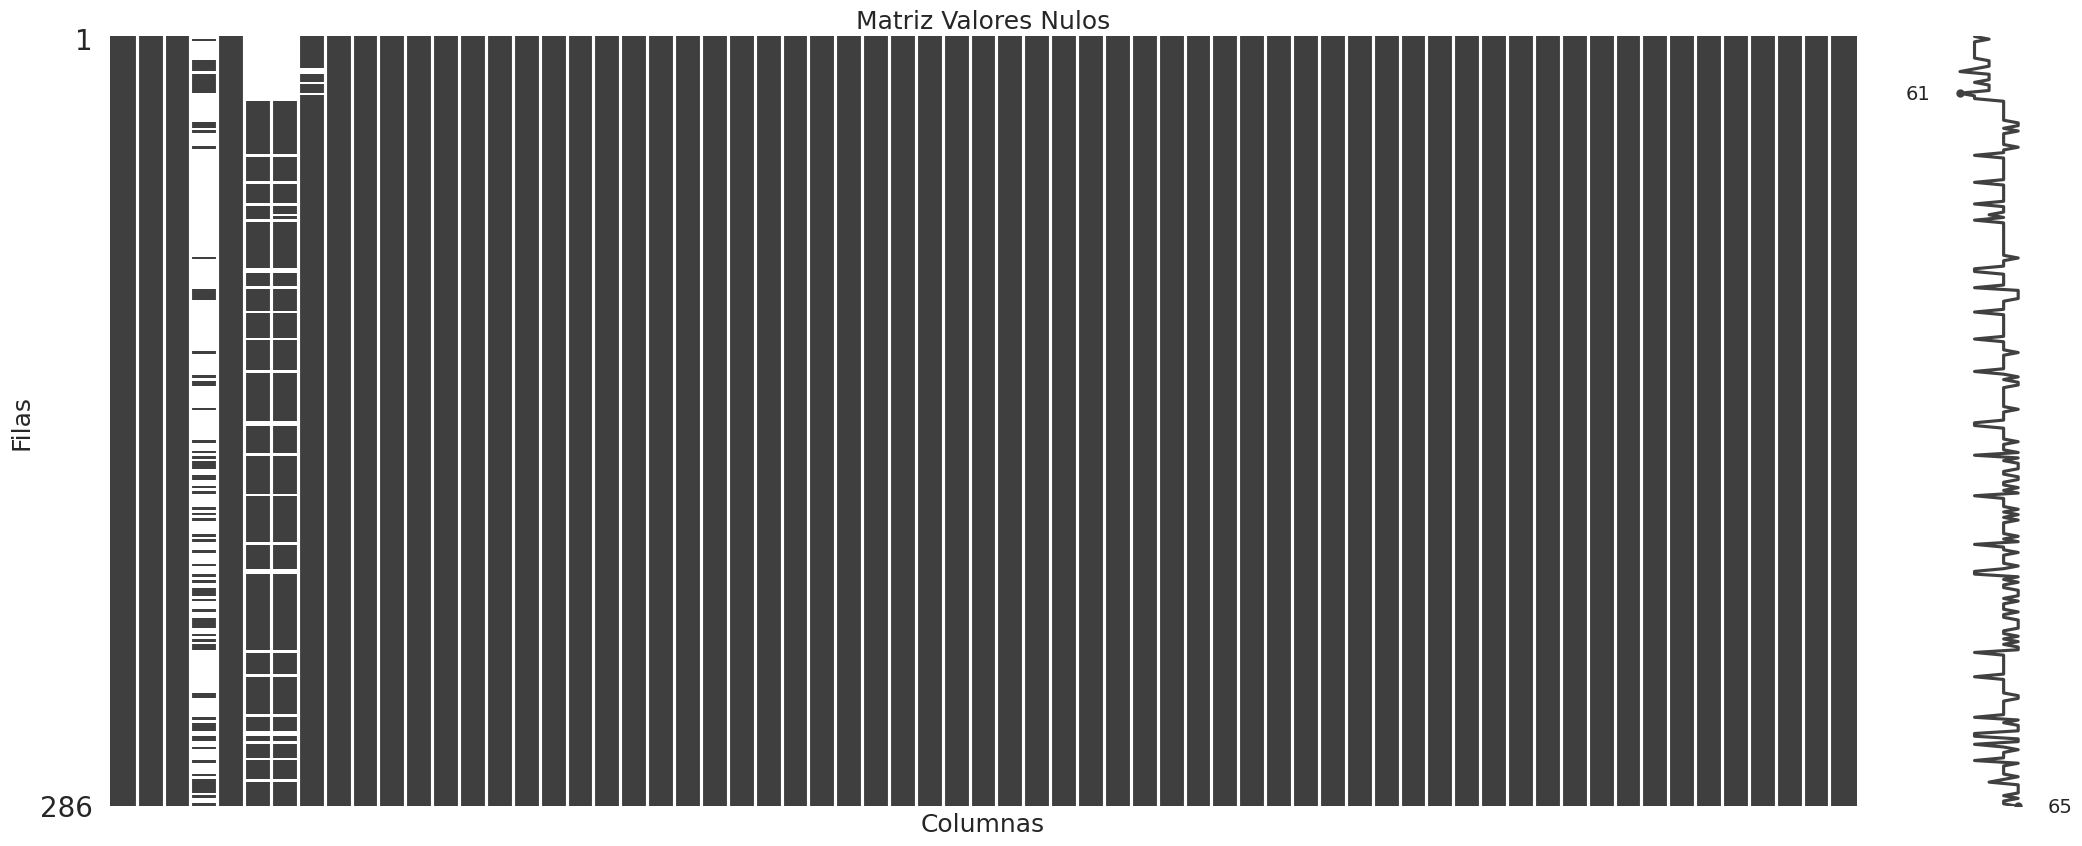

In [78]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [79]:
#Identificar los valores unicos por columna
df_population.nunique()


Index                                                                                             286
Variant                                                                                             1
Region, subregion, country or area *                                                              285
Notes                                                                                              43
Location code                                                                                     286
                                                                                                 ... 
Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)       284
Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)        283
Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)    283
Net Number of Migrants (thousands)                                                